In [1]:
state = 'IA' 
year = 2020
objective_types = ['average_Polsby_Popper']
starting_deviation = 0.01 

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of IA has 4 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))
from IA_plans_2020 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 53044 plans from file.


In [6]:
from epsilon_constraint import epsilon_constraint_method
from pareto import filter_and_sort_pareto
from metrics import scores

plans_dict = {}
for obj_type in objective_types:
    
    print(f"\n{'#' * 100}")
    print(f"Applying epsilon-constraint method for {state} with compactness objective {obj_type}")
    print(f"{'#' * 100}\n")
    
    plans_scores = [scores(G, plan, G._ideal_population, obj_type) for plan in warm_starts]
    _,_,nondominated_warm_starts_plans = filter_and_sort_pareto(plans=warm_starts, upper_bounds=plans_scores, obj_type=obj_type)
    print(f"Passing {len(nondominated_warm_starts_plans)} nondominated warm start plans")
    
    (new_plans, obj_bounds, deviations) = epsilon_constraint_method(
                G,                 
                obj_type,          
                contiguity ='lcut',                                             # {'lcut', 'scf', 'shir'} 
                cutoff=None,       
                verbose=True,
                warm_start_mode ='user',                                        # {'None', 'user', 'refinement'}
                warm_starts=nondominated_warm_starts_plans,                                         # if you have user define warm starts else it is None
                starting_deviation=starting_deviation, 
                time_limit=600, 
                sizes=None,      
                max_B=True,                                                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True   
                symmetry_breaking='orbitope',                                    # {None, 'orbitope', 'rsum'} 
                state=state,
                year=year
            )
    plans_dict[(state, obj_type)] = list(zip(new_plans, obj_bounds, deviations))
    warm_starts += new_plans


####################################################################################################
Applying epsilon-constraint method for IA with compactness objective average_Polsby_Popper
####################################################################################################

Passing 22 nondominated warm start plans
Initially, L = 789617 and U = 805568 and k = 4.

****************************************
Trying deviation = 7975.922500000001
****************************************
Using user-provided warm starts.
Selected warm_start = [[4, 8, 10, 17, 18, 93], [5, 6, 7, 11, 13, 15, 29, 34, 45, 51, 56, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90], [3, 12, 24, 25, 26, 28, 38, 39, 44, 46, 47, 48, 54, 60, 61, 67, 68, 76, 78, 83, 86, 94, 95, 96, 97, 98], [0, 1, 2, 9, 14, 16, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 43, 49, 50, 52, 53, 55, 57, 58, 59, 62, 63, 64, 65, 66, 70, 71, 73, 74, 79, 81, 84, 89, 91, 92]]
Objective value: 0.5064919713943423
Deviation:

 43465 18151    0.56245   28  544    0.50649    0.81075  60.1%   424  422s
 45193 18959 infeasible   40         0.50649    0.81028  60.0%   423  437s
 47329 19482 infeasible   56         0.50649    0.80992  59.9%   422  452s
 49384 20185    0.56025   38  645    0.50649    0.80948  59.8%   423  468s
 51603 20781 infeasible   24         0.50649    0.80897  59.7%   423  484s
 53402 21310    0.62273   32  641    0.50649    0.80855  59.6%   421  499s
 55330 21981    0.65478   26  628    0.50649    0.80815  59.6%   422  517s
 57925 22537     cutoff   32         0.50649    0.80731  59.4%   420  534s
 60211 23135    0.68695   27  610    0.50649    0.80639  59.2%   419  550s
 62663 23455 infeasible   40         0.50649    0.79425  56.8%   419  566s
 64603 24146    0.64778   40  645    0.50649    0.77863  53.7%   420  582s
 66936 25237    0.51474   51  703    0.50649    0.77368  52.8%   419  597s
 69299 25384    0.68591   33  581    0.50649    0.74914  47.9%   418  600s

Cutting planes:
  Gomory

Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 5003 rows, 4372 columns and 19255 nonzeros
Model fingerprint: 0xd40c7a22
Model has 4 quadratic constraints
Variable types: 1280 continuous, 3092 integer (3092 binary)
Coefficient statistics:
  Matrix range     [1e-06, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [2e-07, 1e-01]

     0     0    0.99991    0  529    0.48461    0.99991   106%     -    4s
     0     0    0.99991    0  524    0.48461    0.99991   106%     -    4s
     0     2    0.99991    0  524    0.48461    0.99991   106%     -    5s
    15    26    0.75000    4  552    0.48461    0.99415   105%  4436   10s
   222   156 infeasible   17         0.48461    0.95165  96.4%  1160   15s
   557   283    0.89531    7  619    0.48461    0.91842  89.5%   733   20s
   820   351    0.68236   16  540    0.48461    0.90467  86.7%   591   27s
   824   358    0.90467   15  551    0.48461    0.90467  86.7%   611   30s
   872   466    0.90467   19  580    0.48461    0.90467  86.7%   776   35s
  1163   583    0.87118   26  510    0.48461    0.90467  86.7%   728   40s
  1476   678    0.78731   33  601    0.48461    0.90467  86.7%   675   45s
  1775   711    0.80892   27  650    0.48461    0.90467  86.7%   645   50s
  2092   849    0.49905   42  550    0.48461    0.90467  86.7%   635   56s
  2407  1013    0.87189  

Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 5003 rows, 4372 columns and 19255 nonzeros
Model fingerprint: 0x26b4e877
Model has 4 quadratic constraints
Variable types: 1280 continuous, 3092 integer (3092 binary)
Coefficient statistics:
  Matrix range     [1e-06, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [2e-07, 1e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]

User MIP start produced solution with

   641   426    0.99764   14  530    0.45458    0.99764   119%   708   25s
   782   544    0.99426   19  571    0.45458    0.99763   119%   805   30s
  1102   644 infeasible   24         0.45458    0.99763   119%   707   35s
  1424   720    0.60633   35  588    0.45458    0.99673   119%   649   40s
  1783   777    0.86898   22  566    0.45458    0.99673   119%   605   45s
  2148   971    0.49883   40  591    0.45458    0.99621   119%   568   50s
  2573  1171 infeasible   27         0.45458    0.99540   119%   550   55s
  2996  1301    0.86995   26  573    0.45458    0.99519   119%   538   60s

Cutting planes:
  Gomory: 2
  Flow cover: 14
  Inf proof: 1
  Zero half: 2
  RLT: 12

Explored 3014 nodes (1642836 simplex iterations) in 60.10 seconds (53.85 work units)
Thread count was 20 (of 20 available processors)

Solution count 3: 0.454583 0.452028 0.444216 

Time limit reached
Best objective 4.545834076407e-01, best bound 9.951875854884e-01, gap 118.9230%

User-callback calls 9876, time 


CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 5003 rows, 4372 columns and 19255 nonzeros
Model fingerprint: 0x831d1b54
Model has 4 quadratic constraints
Variable types: 1280 continuous, 3092 integer (3092 binary)
Coefficient statistics:
  Matrix range     [1e-06, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [2e-07, 1e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]

User MIP start produced solution with objective 0.423241 (0.04s)
User MIP start produced solution with objective 0.431054 (0.05s)
User MIP start produced solution with objective 0.434659 (0.06s)
Loaded user MIP start with objective 0.434659

Presolve removed 2229 rows and 1803 columns
Presolve time: 0.05s
Presolved: 2774 rows, 2569 col

  1042   591    0.87033   24  568    0.43315    0.99773   130%   890   45s
  1353   678    0.68545   31  608    0.43315    0.99773   130%   808   50s
  1664   765    0.68524   37  599    0.43315    0.99770   130%   733   55s
  2020   884 infeasible   47         0.43315    0.99762   130%   674   60s

Cutting planes:
  Gomory: 3
  Flow cover: 28
  Zero half: 7
  RLT: 11

Explored 2108 nodes (1431278 simplex iterations) in 60.07 seconds (57.55 work units)
Thread count was 20 (of 20 available processors)

Solution count 3: 0.43315 0.429545 0.421732 

Time limit reached
Best objective 4.331502914429e-01, best bound 9.976167101630e-01, gap 130.3165%

User-callback calls 8163, time in user-callback 0.05 sec
Time limit reached! Best feasible solution found:

****************************************
No optimal solution found! Gurobi status: 9
****************************************
Time limit 60 reached. Subsequent deviations will use quick time limit 60.
plan = [[1, 2, 8, 21, 22, 27, 41, 48, 


CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 5003 rows, 4372 columns and 19255 nonzeros
Model fingerprint: 0xe88850df
Model has 4 quadratic constraints
Variable types: 1280 continuous, 3092 integer (3092 binary)
Coefficient statistics:
  Matrix range     [1e-06, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [2e-07, 1e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]

User MIP start produced solution with objective 0.394097 (0.04s)
User MIP start produced solution with objective 0.409722 (0.04s)
User MIP start produced solution with objective 0.416894 (0.04s)
Loaded user MIP start with objective 0.416894

Presolve removed 2229 rows and 1803 columns
Presolve time: 0.04s
Presolved: 2774 rows, 2569 col

  Clique: 1
  Flow cover: 21
  Inf proof: 1
  Zero half: 5
  RLT: 7

Explored 2494 nodes (1583630 simplex iterations) in 60.08 seconds (57.80 work units)
Thread count was 20 (of 20 available processors)

Solution count 3: 0.403972 0.389416 0.358166 

Time limit reached
Best objective 4.039721488953e-01, best bound 9.965619615759e-01, gap 146.6908%

User-callback calls 8929, time in user-callback 0.06 sec
Time limit reached! Best feasible solution found:

****************************************
No optimal solution found! Gurobi status: 9
****************************************
Time limit 60 reached. Subsequent deviations will use quick time limit 60.
plan = [[0, 4, 8, 16, 30, 36, 43, 49, 50, 57, 64, 66, 70, 74, 81], [3, 10, 12, 18, 24, 25, 26, 38, 39, 44, 45, 46, 47, 48, 54, 61, 67, 83, 86, 94, 95, 96, 97, 98], [1, 2, 9, 14, 17, 19, 20, 21, 22, 23, 27, 31, 32, 33, 35, 37, 40, 41, 42, 52, 53, 55, 58, 59, 60, 62, 63, 65, 68, 71, 73, 76, 78, 79, 84, 89, 91, 92, 93], [5, 6, 7, 11, 13, 15,

User MIP start produced solution with objective 0.380115 (0.05s)
User MIP start produced solution with objective 0.387287 (0.05s)
Loaded user MIP start with objective 0.387287

Presolve removed 2229 rows and 1803 columns
Presolve time: 0.05s
Presolved: 2774 rows, 2569 columns, 12075 nonzeros
Presolved model has 4 quadratic constraint(s)
Variable types: 92 continuous, 2477 integer (2452 binary)

Root relaxation: objective 9.999990e-01, 684 iterations, 0.02 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.00000    0   34    0.38729    1.00000   158%     -    0s
     0     0    1.00000    0  604    0.38729    1.00000   158%     -    0s
     0     0    1.00000    0  648    0.38729    1.00000   158%     -    1s
     0     0    1.00000    0  480    0.38729    1.00000   158%     -    2s
     0     0    1.00000    0  480    0.38729    1.00000   158%

Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 5003 rows, 4372 columns and 19255 nonzeros
Model fingerprint: 0xd54fe1c1
Model has 4 quadratic constraints
Variable types: 1280 continuous, 3092 integer (3092 binary)
Coefficient statistics:
  Matrix range     [1e-06, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [2e-07, 1e-01]

   355   241    0.87310    9  574    0.32167    0.99899   211%   911   20s
   646   375    0.57726   29  411    0.32167    0.99811   210%   739   25s
   705   388    0.99811   11  559    0.32167    0.99811   210%   726   30s
   753   479    0.99811   15  608    0.32167    0.99811   210%   880   35s
  1043   622    0.93515   22  608    0.32167    0.99811   210%   804   40s
  1420   703    0.99424   19  581    0.32167    0.99811   210%   707   45s
  1719   767    0.80885   28  597    0.32167    0.99809   210%   659   50s
  2140   992    0.77753   25  577    0.32167    0.99806   210%   609   55s
  2590  1230    0.65431   35  519    0.32167    0.99755   210%   575   60s

Cutting planes:
  Gomory: 4
  Flow cover: 27
  Zero half: 2
  RLT: 9

Explored 2609 nodes (1547540 simplex iterations) in 60.08 seconds (53.62 work units)
Thread count was 20 (of 20 available processors)

Solution count 5: 0.321671 0.321671 0.321668 ... 0.298871

Time limit reached
Best objective 3.216714859009e-01, best b


Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 5003 rows, 4372 columns and 19255 nonzeros
Model fingerprint: 0xd731fc56
Model has 4 quadratic constraints
Variable types: 1280 continuous, 3092 integer (3092 binary)
Coefficient statistics:
  Matrix range     [1e-06, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [2e-07, 1e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]

User MIP start produced solution with objective 0.266025 (0.05s)
User MIP start produced solution with objective 0.28165 (0.05s)
User MIP start produced solution with objective 0.289285 (0.06s)
Loaded user MIP start with objective 0.289285

Presolve removed 2229 rows and 1803 columns
Presolve time: 0.05s
Presolved: 2774 rows, 2569 columns, 12075 nonzeros
Presolved model has 4 quadratic constraint(s)
Variable types: 92 continuous, 2477 integer (2452 binary)

Root relaxation: objective 9.999990e-01, 

Thread count was 20 (of 20 available processors)

Solution count 3: 0.285318 0.277683 0.262058 

Time limit reached
Best objective 2.853183746338e-01, best bound 9.948105676541e-01, gap 248.6668%

User-callback calls 7592, time in user-callback 0.06 sec
Time limit reached! Best feasible solution found:

****************************************
No optimal solution found! Gurobi status: 9
****************************************
Time limit 60 reached. Subsequent deviations will use quick time limit 60.
plan = [[4, 8, 10, 17, 37, 53, 62, 93], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [5, 7, 13, 18, 24, 26, 29, 38, 39, 44, 45, 46, 48, 50, 56, 57, 67, 69, 72, 74, 75, 78, 80, 82, 83, 87, 90, 94, 95, 97], [0, 1, 2, 6, 9, 12, 14, 16, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 36, 40, 41, 42, 43, 49, 52, 55, 58, 59, 60, 63, 64, 65, 66, 68, 70, 71, 73, 76, 79, 81, 84, 86, 89, 91, 92, 96]]

****************************************
Trying deviation = 2.125
*************************

No feasible solution was found within the region: [0, 0.8]

####################################################################################################
Pareto Frontier for state IA,  objective average_Polsby_Popper
####################################################################################################

Pareto front plans: [[[8, 14, 17, 37, 43, 53, 62, 66, 68, 73, 78, 79, 93], [3, 11, 15, 26, 28, 38, 39, 45, 54, 67, 75, 83, 85, 88, 95, 97, 98], [5, 7, 13, 16, 24, 25, 29, 30, 34, 35, 36, 40, 44, 47, 50, 51, 56, 57, 61, 64, 69, 70, 72, 74, 77, 80, 81, 82, 87, 89, 90], [0, 1, 2, 4, 6, 9, 10, 12, 18, 19, 20, 21, 22, 23, 27, 31, 32, 33, 41, 42, 46, 48, 49, 52, 55, 58, 59, 60, 63, 65, 71, 76, 84, 86, 91, 92, 94, 96]], [[4, 8, 10, 17, 37, 53, 62, 93], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [5, 7, 13, 18, 24, 26, 29, 38, 39, 44, 45, 46, 48, 50, 56, 57, 67, 69, 72, 74, 75, 78, 80, 82, 83, 87, 90, 94, 95, 97], [0, 1, 2, 6, 9, 12, 14, 16, 19, 20, 21, 22, 23,

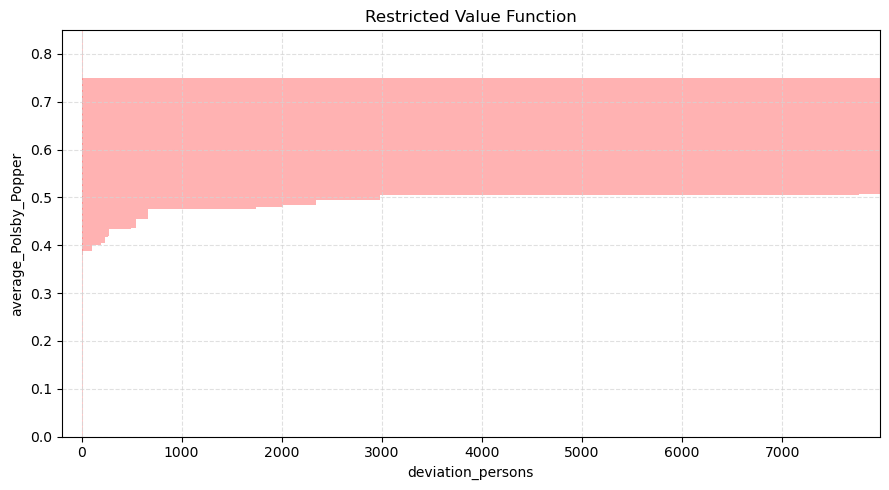

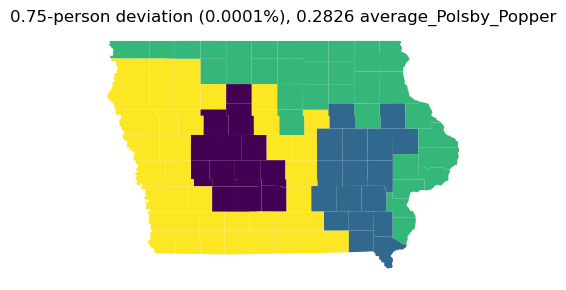

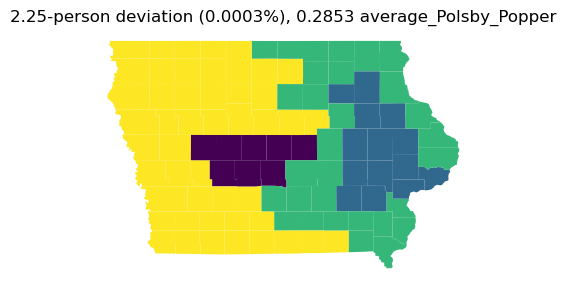

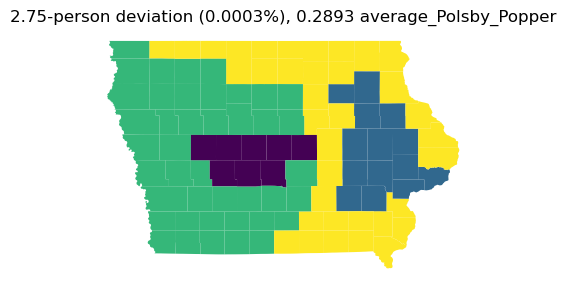

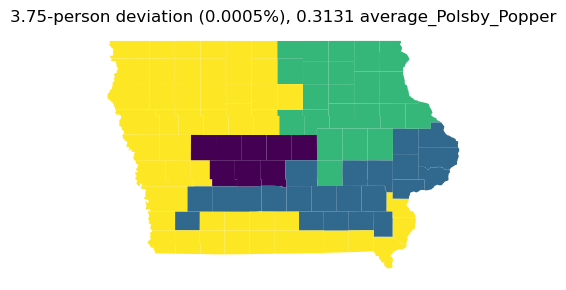

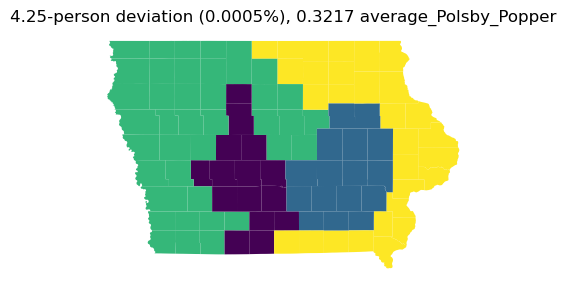

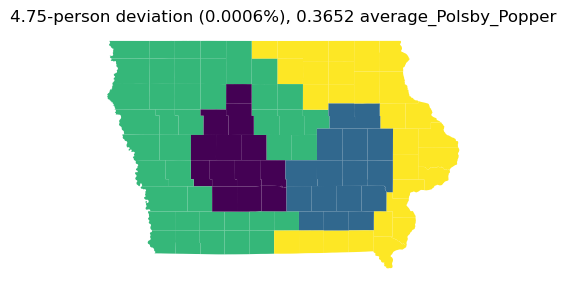

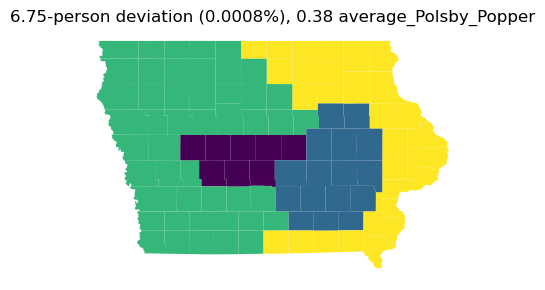

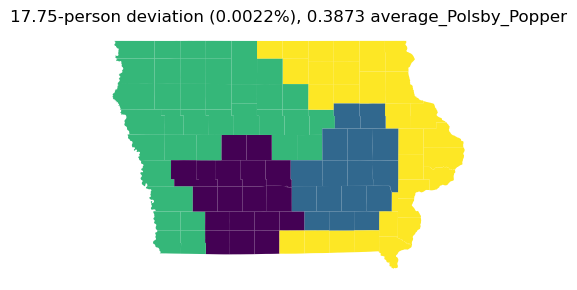

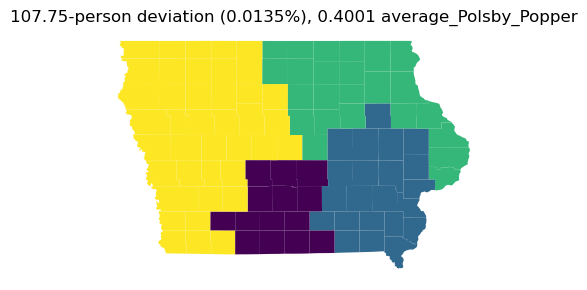

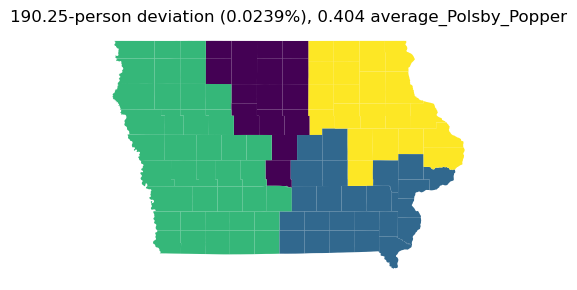

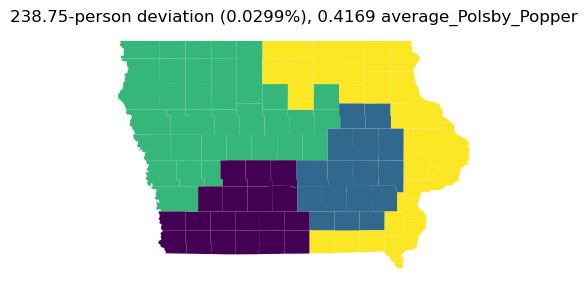

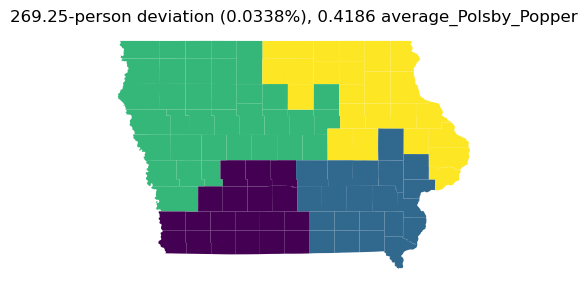

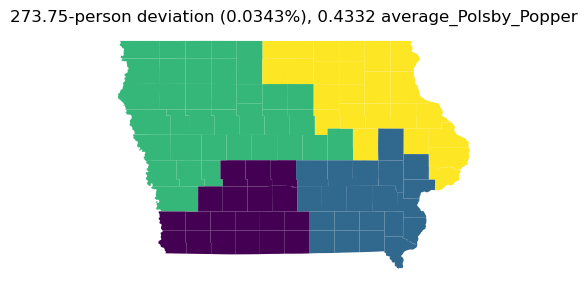

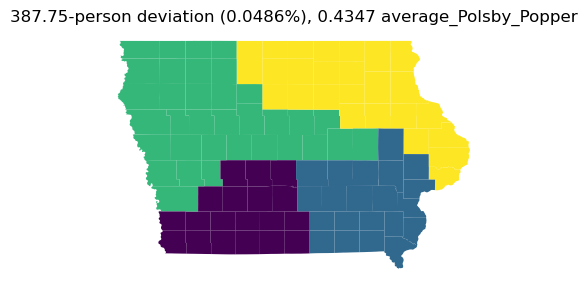

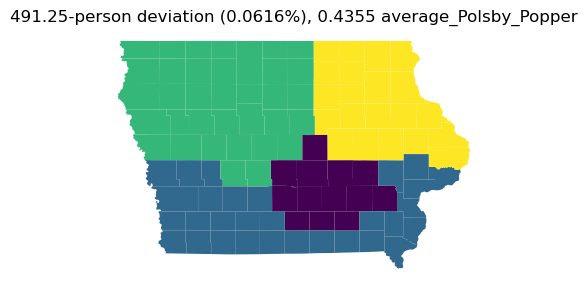

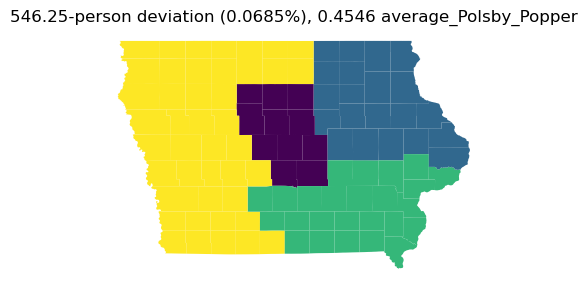

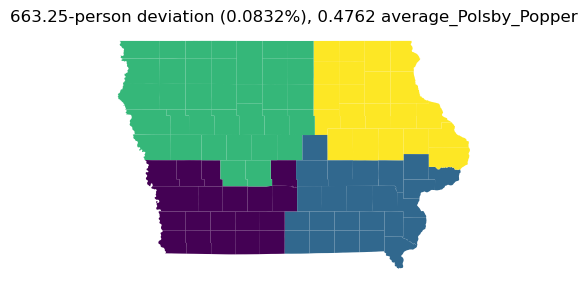

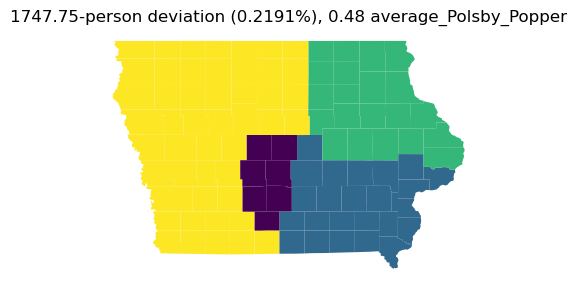

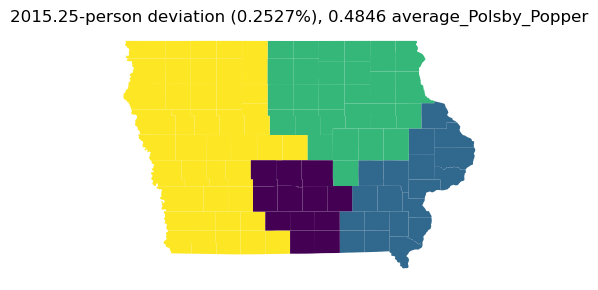

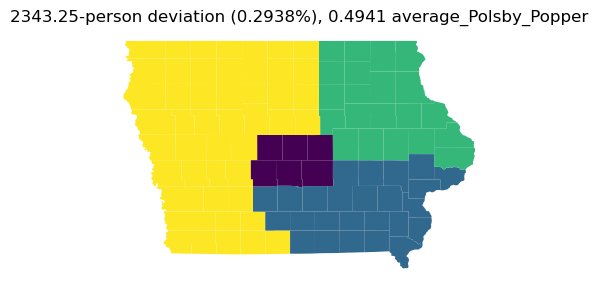

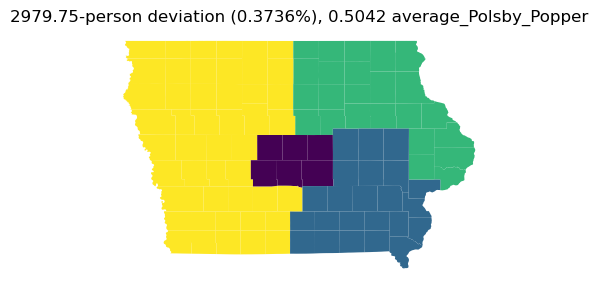

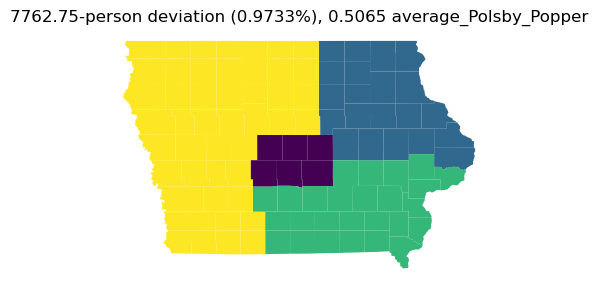

In [7]:
from pareto import plot_pareto_frontiers

epsilon = 1 / (2 * G._k)
for (state, obj_type), result in plans_dict.items():
    
    min_deviation = min(round(r[2], 1) for r in result)
    if min_deviation < epsilon:
        no_solution_region = None
    else:
        no_solution_region = [0, min_deviation]
        print(f"No feasible solution was found within the region: {no_solution_region}")
        
    plot_pareto_frontiers(
                    G,
                    method='epsilon_constraint_method',
                    plans=None,                                   #if method ='epsilon_constraint_method' is None 
                    obj_types=obj_type,                               
                    ideal_population=G._ideal_population,
                    state=state,
                    filepath=filepath,
                    filename2=filename2,
                    no_solution_region=no_solution_region,
                    year=year,
                    result=result                               #if method ='heuristic' is None 
                 )